# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

# import & prepare dataset

In [2]:
# read data files.

content = pd.read_csv('/content/Content.csv')
reactions = pd.read_csv('/content/Reactions.csv')
reactions_type = pd.read_csv('/content/ReactionTypes.csv')

In [3]:
content.head(2)

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...


In [4]:
reactions.head(2)

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50


In [5]:
reactions_type.head(2)

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70


In [6]:
# drop 'Unnamed: 0' column.

content.drop(columns='Unnamed: 0', axis=1, inplace=True)
reactions.drop(columns='Unnamed: 0', axis=1, inplace=True)
reactions_type.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [7]:
# rename 'Type' column to 'content_type' to avoid conflicte with other column.

content.rename(columns={'Type': 'content_type'}, inplace=True)

In [8]:
# merge content & reactions DataFrames on ['Content ID', 'User ID'] columns and save result in df.

df = pd.merge(left=content, right=reactions, how='inner', on=['Content ID', 'User ID'])

In [9]:
# merge df & reactions_type DataFrames on 'Type' column and save result in df.

df = pd.merge(left=df, right=reactions_type, how='inner', on='Type')

In [10]:
df.head()

,Content ID,User ID,content_type,Category,URL,Type,Datetime,Sentiment,Score
0,0adb9a94-210a-4e84-bca1-13db9452ff0e,f3eb7ee0-7788-43a0-9686-1c399260b17e,video,healthy eating,NaN,adore,2021-06-04 07:13:06,positive,72
1,36d36f19-7a10-4d7d-a3ab-a3f2cbbfcf4a,69532ce2-1ffe-4187-8042-0230d115b24e,photo,food,https://socialbuzz.cdn.com/content/storage/36d...,worried,2021-02-12 00:36:14,negative,12
2,f1038e6c-5292-4e20-a866-675e1637d6b5,13f0db8a-152a-496f-a6e8-1ed6a90b8788,GIF,soccer,https://socialbuzz.cdn.com/content/storage/f10...,cherish,2020-09-01 12:38:42,positive,70
3,ff883828-a610-492d-8635-8a777eaad25f,ded166ee-173b-4a56-bc6d-464c35709670,photo,education,https://socialbuzz.cdn.com/content/storage/ff8...,peeking,2021-02-07 12:32:32,neutral,35
4,b1c49557-0623-4fb2-8f22-1453286fedad,54a8e072-5369-4122-9189-43b55e1a4ba2,video,healthy eating,NaN,hate,2021-06-11 19:59:37,negative,5


# Data Cleaning

In [11]:
# check data type & null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Content ID    42 non-null     object
 1   User ID       42 non-null     object
 2   content_type  42 non-null     object
 3   Category      42 non-null     object
 4   URL           35 non-null     object
 5   Type          42 non-null     object
 6   Datetime      42 non-null     object
 7   Sentiment     42 non-null     object
 8   Score         42 non-null     int64 
dtypes: int64(1), object(8)
memory usage: 3.1+ KB


In [12]:
# check null values

print(df.isna().sum())

Content ID      0
User ID         0
content_type    0
Category        0
URL             7
Type            0
Datetime        0
Sentiment       0
Score           0
dtype: int64


In [13]:
print(f"sum of duplicated values= {df.duplicated().sum()}")

sum of duplicated values= 0


In [14]:
df.dropna(axis= 'index', inplace= True)

In [15]:
# change data type of df['Datetime'] to date
# first check it's format

print(df['Datetime'].head())

1    2021-02-12 00:36:14
2    2020-09-01 12:38:42
3    2021-02-07 12:32:32
5    2020-08-10 10:44:10
6    2021-06-08 06:56:52
Name: Datetime, dtype: object


In [16]:
# check on sum of null values after set new formating.

print(f"sum of null values after convert to date: {pd.to_datetime(df['Datetime'], format= 'mixed').isna().sum()}")

sum of null values after convert to date: 0


In [17]:
df['Datetime']= pd.to_datetime(df['Datetime'], format= 'mixed')

In [18]:
# check null values.

print(df.isnull().sum())

Content ID      0
User ID         0
content_type    0
Category        0
URL             0
Type            0
Datetime        0
Sentiment       0
Score           0
dtype: int64


In [19]:
# drop 'URL' column.

df.drop(columns='URL', axis= 'column', inplace=True)

In [20]:
print(df.columns)

Index(['Content ID', 'User ID', 'content_type', 'Category', 'Type', 'Datetime',
       'Sentiment', 'Score'],
      dtype='object')


In [21]:
# check data integrity

for col in df.columns:
    if (df[col].dtypes == 'object') & (len(df[col].unique()) <= 20):
        print(f"column name: {col}")
        print(f"{df[col].unique()}\n")

column name: content_type
['photo' 'GIF' 'video' 'audio']

column name: Category
['food' 'soccer' 'education' 'public speaking' 'travel' 'tennis' 'cooking'
 'culture' 'animals' 'healthy eating' 'science' 'technology']

column name: Type
['worried' 'cherish' 'peeking' 'adore' 'scared' 'dislike' 'disgust' 'hate'
 'want' 'love' 'super love' 'interested' 'like' 'indifferent' 'heart'
 'intrigued']

column name: Sentiment
['negative' 'positive' 'neutral']



In [22]:
# check index

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 1 to 41
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Content ID    35 non-null     object        
 1   User ID       35 non-null     object        
 2   content_type  35 non-null     object        
 3   Category      35 non-null     object        
 4   Type          35 non-null     object        
 5   Datetime      35 non-null     datetime64[ns]
 6   Sentiment     35 non-null     object        
 7   Score         35 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 2.5+ KB


In [23]:
# reset index

df.reset_index(drop=True, inplace=True)

In [24]:
# check again

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Content ID    35 non-null     object        
 1   User ID       35 non-null     object        
 2   content_type  35 non-null     object        
 3   Category      35 non-null     object        
 4   Type          35 non-null     object        
 5   Datetime      35 non-null     datetime64[ns]
 6   Sentiment     35 non-null     object        
 7   Score         35 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 2.3+ KB


# Data Analysis

In [25]:
# check correlation between numerical data

df.corr(numeric_only= True)

,Score
Score,1.0


In [91]:
# Analyse Score column

# It is cuantitive data & continuous
# Measure of Center: 1.mean, 2.median, 3.mode
# Measure of spread: 5 number summary: min, Q1=25%, Q2=50%=meadian, Q3=75%, max
# Measure of shape in histgram dig.
# Outliers

print(f"mode = {df['Score'].mode()}\n")

print(f"5 num summary:\n{df['Score'].describe().round(2)}\n")

print(f"range of the data= {df['Score'].max() - df['Score'].min()}\n")

print(f"skew= {df['Score'].skew().round(2)}")

mode = 0    65
Name: Score, dtype: int64

5 num summary:
count    35.00
mean     39.03
std      25.41
min       0.00
25%      15.00
50%      35.00
75%      65.00
max      75.00
Name: Score, dtype: float64

range of the data= 75

skew= -0.04


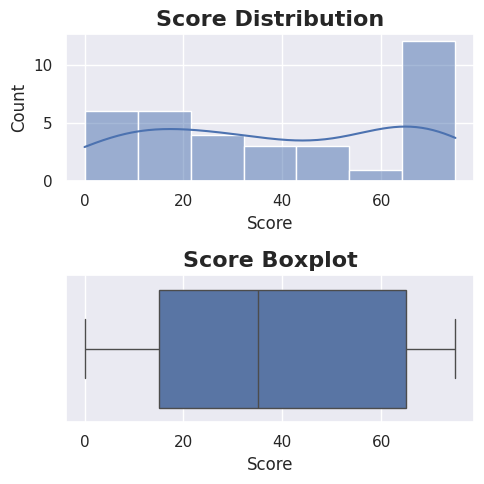

In [132]:
# visualizing data

plt.figure(figsize= (5, 5))

plt.subplot(2, 1, 1)
sns.histplot(data= df,
             x= 'Score',
             bins= 'auto',
             kde= True)
plt.title('Score Distribution', fontdict= {'size': 16, 'weight': 'bold'})


plt.subplot(2, 1, 2)
sns.boxplot(data= df,
            x= 'Score')
plt.title('Score Boxplot', fontdict= {'size': 16, 'weight': 'bold'})

plt.tight_layout()
plt.show()

In [138]:
print(df[(df['Score'] >= 65) & (df['Score'] <= 75)]['Category'].value_counts())

Category
public speaking    3
cooking            2
culture            2
animals            2
soccer             1
education          1
science            1
Name: count, dtype: int64


# Categorical Data

In [ ]:
# Analyse Score with Category column

print(df.groupby('Category', as_index= False).agg({'Score': 'sum'}).sort_values(by= 'Score', ascending= False))

           Category  Score
6   public speaking    232
7           science    227
2           culture    150
0           animals    145
3         education    140
1           cooking    135
8            soccer    135
11           travel    115
10           tennis     35
5    healthy eating     35
4              food     12
9        technology      5


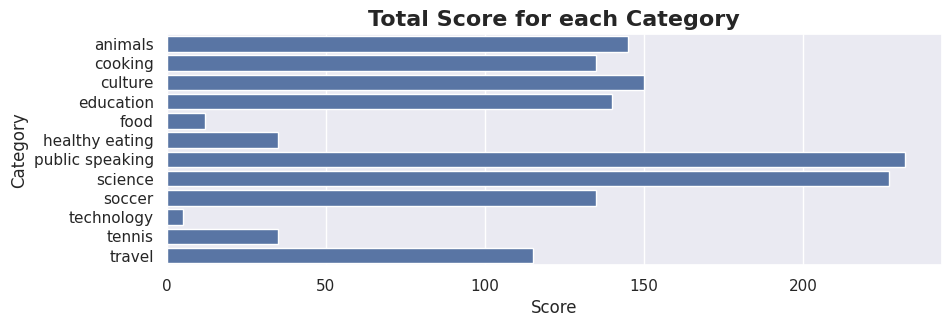

In [101]:
plt.figure(figsize= (10, 3))

sns.barplot(data= df.groupby('Category', as_index= False).agg({'Score': 'sum'}), x= 'Score', y= 'Category', orient= 'h')
plt.title('Total Score for each Category', fontdict= {'size': 16, 'weight': 'bold'})
plt.show()

In [112]:
px.pie(data_frame= df.groupby('Category', as_index= False).agg({'Score': 'sum'}),
       values= 'Score',
       names= 'Category',
       title= 'Percetage of Total Score for each Category',
       height= 500,
       width= 700)

In [ ]:
for cat in df['Category'].unique(): # loop in Category column
    print(f"category name: {cat}\n") # print Category
    print(f"{df[df['Category'] == cat]['Score']}\n") # print Score for each Category
    print(f"{df[df['Category'] == cat]['Score'].describe().round(2)}\n") # print describe for each Score for each Category

category name: food

0    12
6     0
Name: Score, dtype: int64

count     2.00
mean      6.00
std       8.49
min       0.00
25%       3.00
50%       6.00
75%       9.00
max      12.00
Name: Score, dtype: float64

category name: soccer

1     70
12    30
17    35
Name: Score, dtype: int64

count     3.00
mean     45.00
std      21.79
min      30.00
25%      32.50
50%      35.00
75%      52.50
max      70.00
Name: Score, dtype: float64

category name: education

2     35
5     10
14    65
15    30
Name: Score, dtype: int64

count     4.00
mean     35.00
std      22.73
min      10.00
25%      25.00
50%      32.50
75%      42.50
max      65.00
Name: Score, dtype: float64

category name: public speaking

3     72
10    65
25    65
30    30
Name: Score, dtype: int64

count     4.00
mean     58.00
std      18.96
min      30.00
25%      56.25
50%      65.00
75%      66.75
max      72.00
Name: Score, dtype: float64

category name: travel

4     15
16    50
29    50
Name: Score, dtype: int64

co

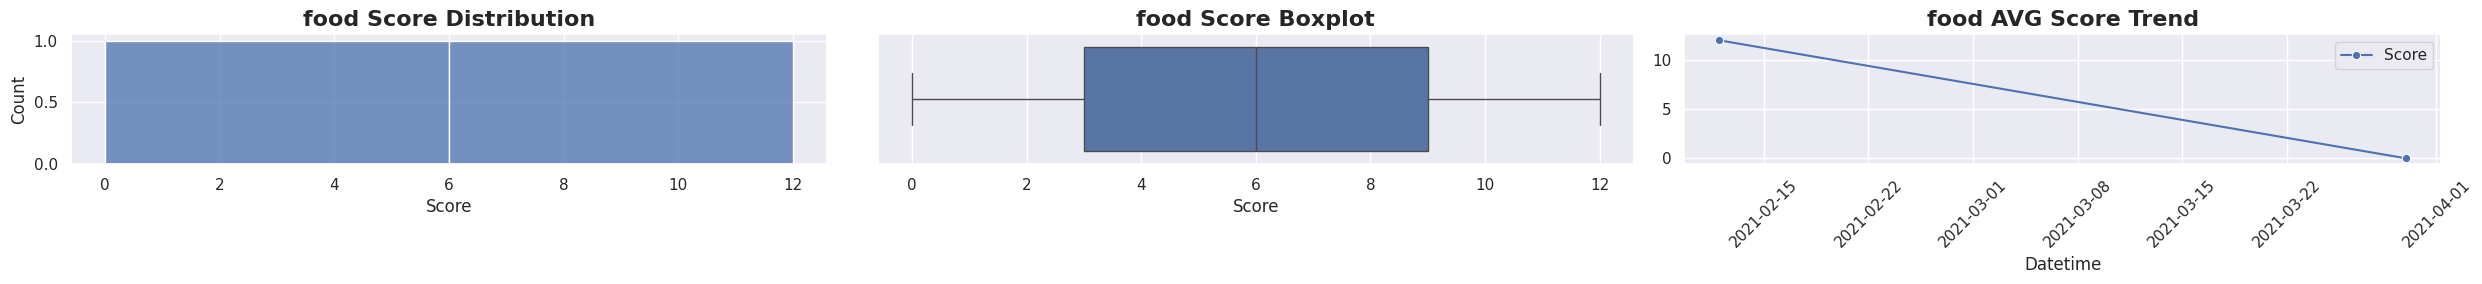

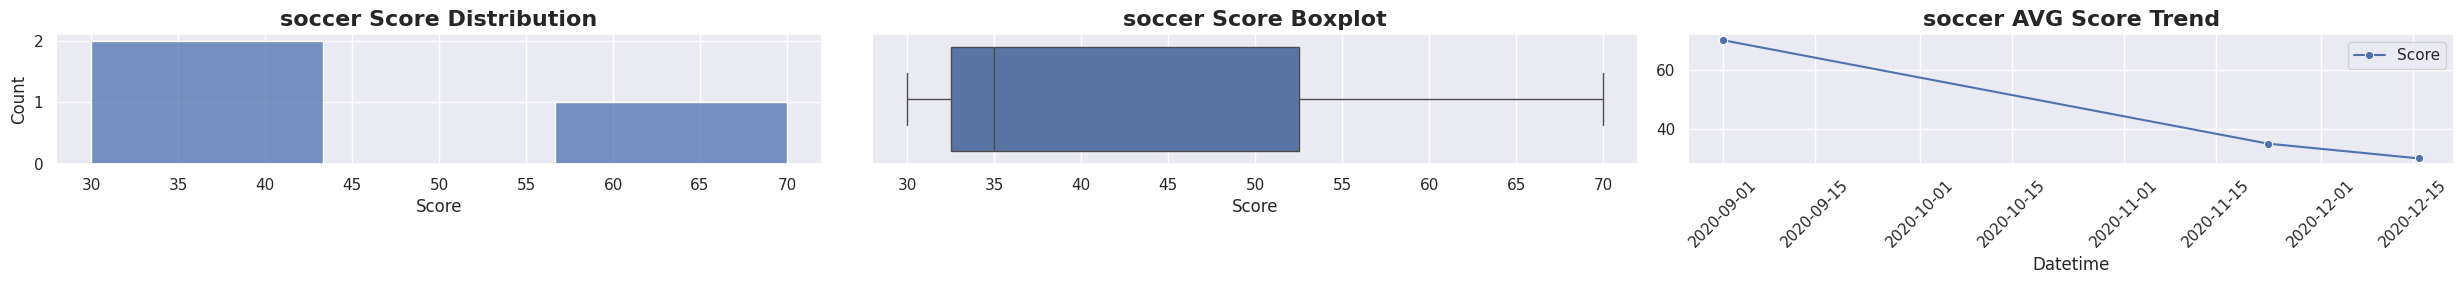

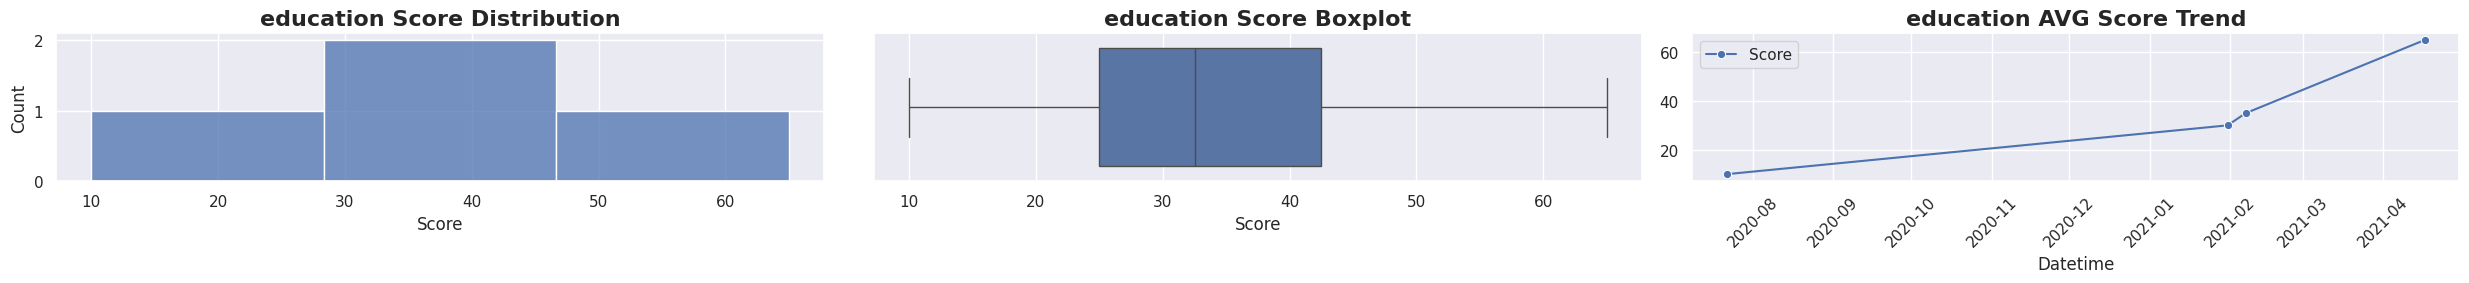

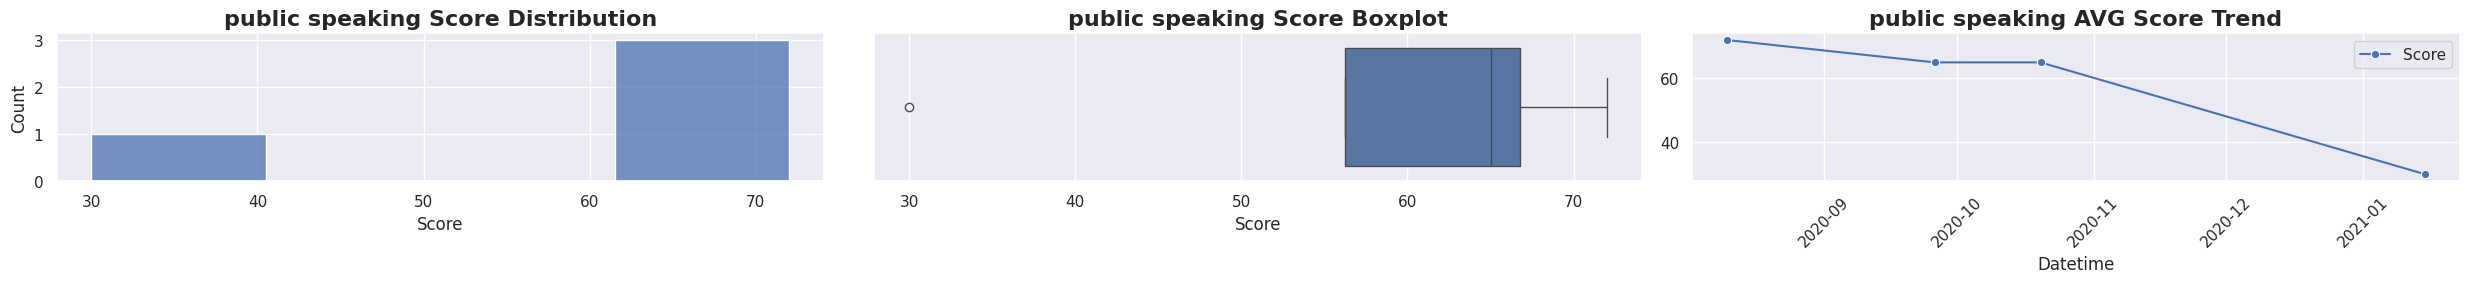

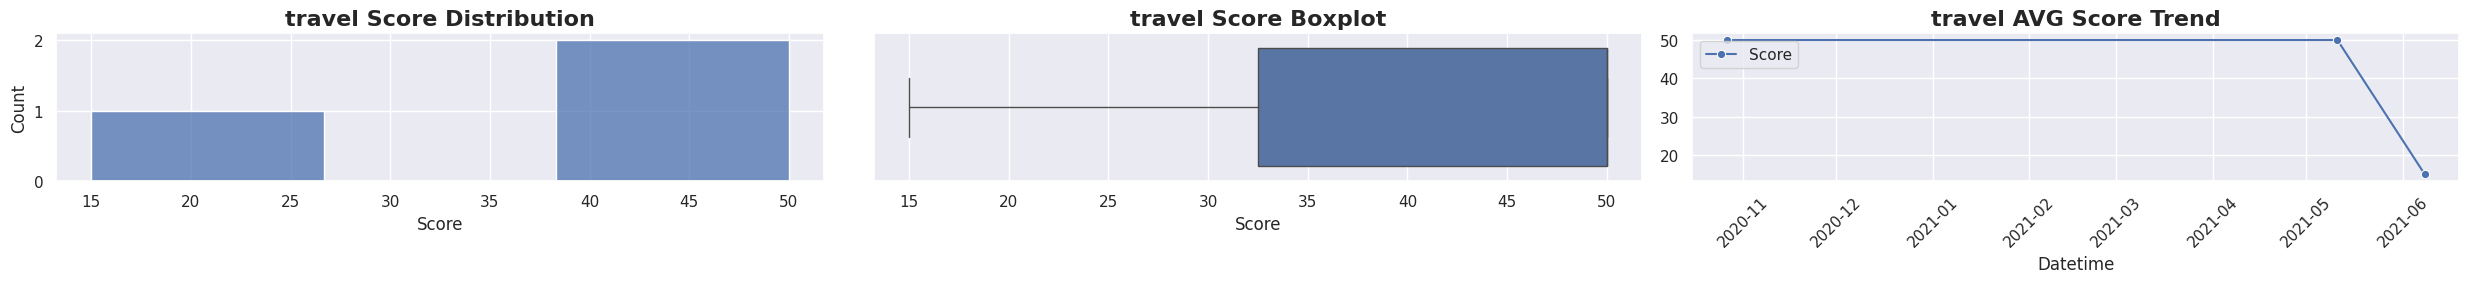

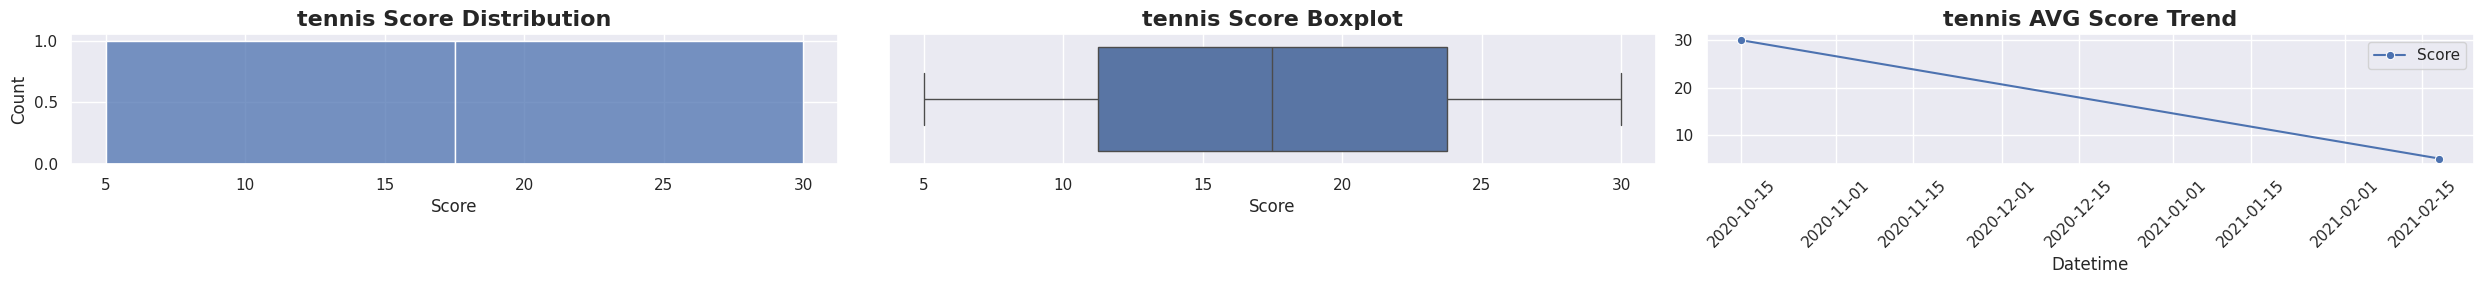

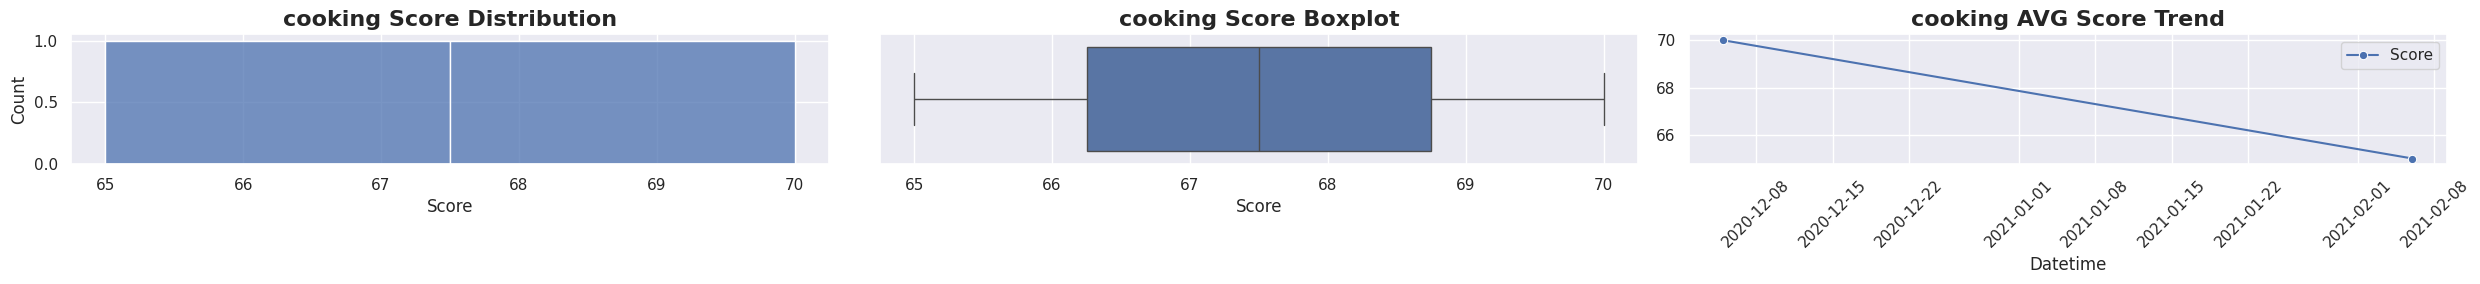

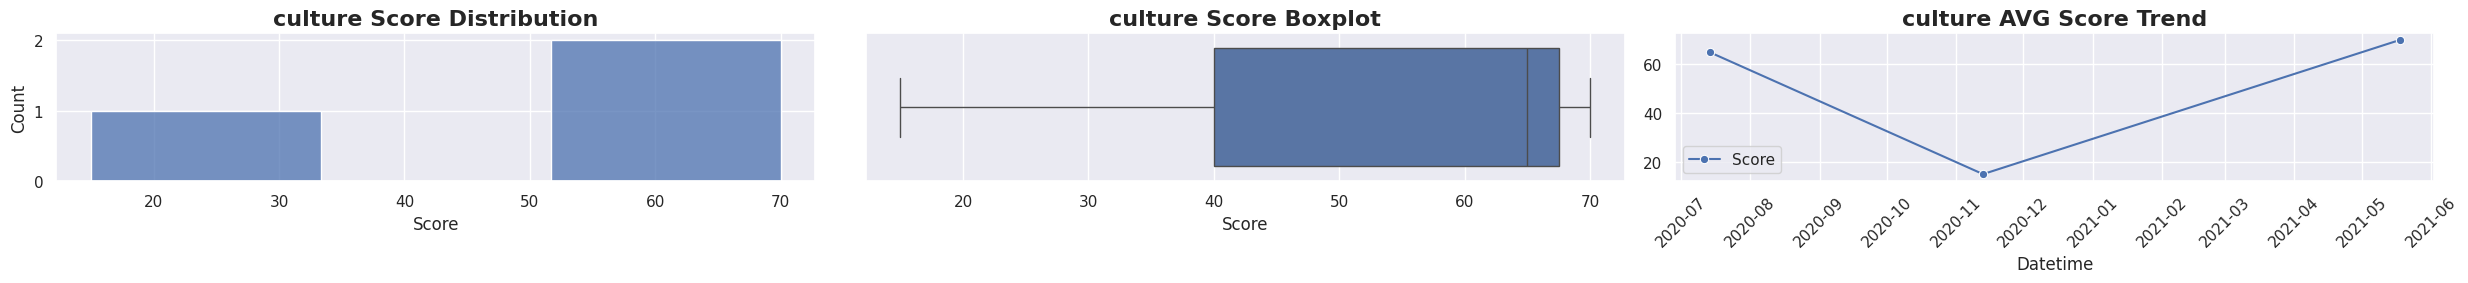

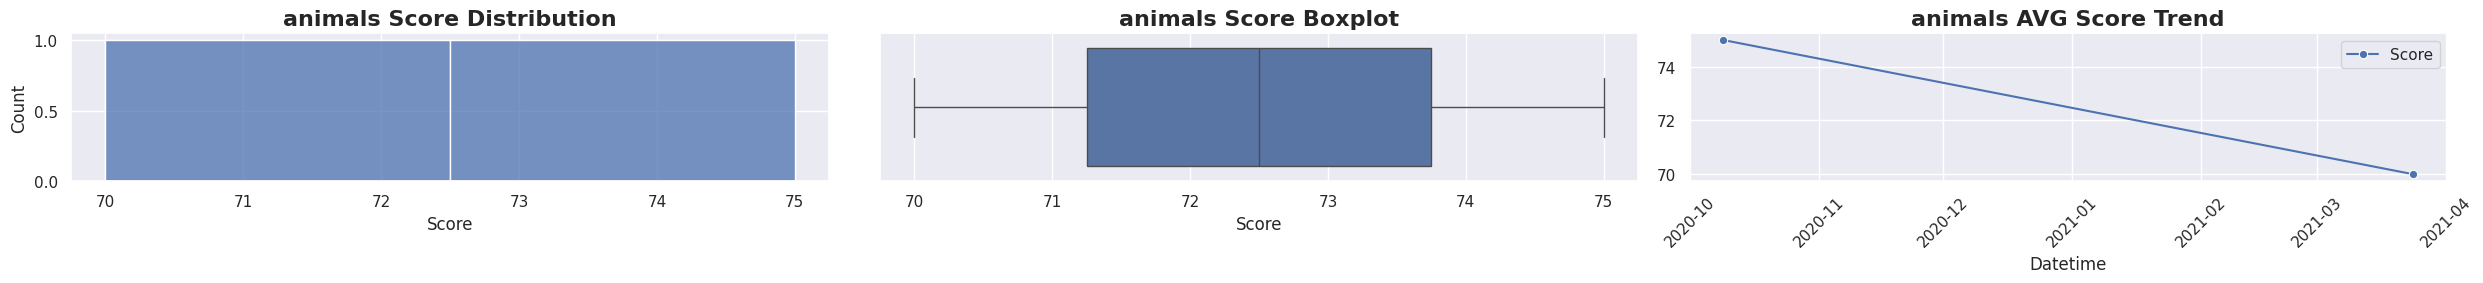

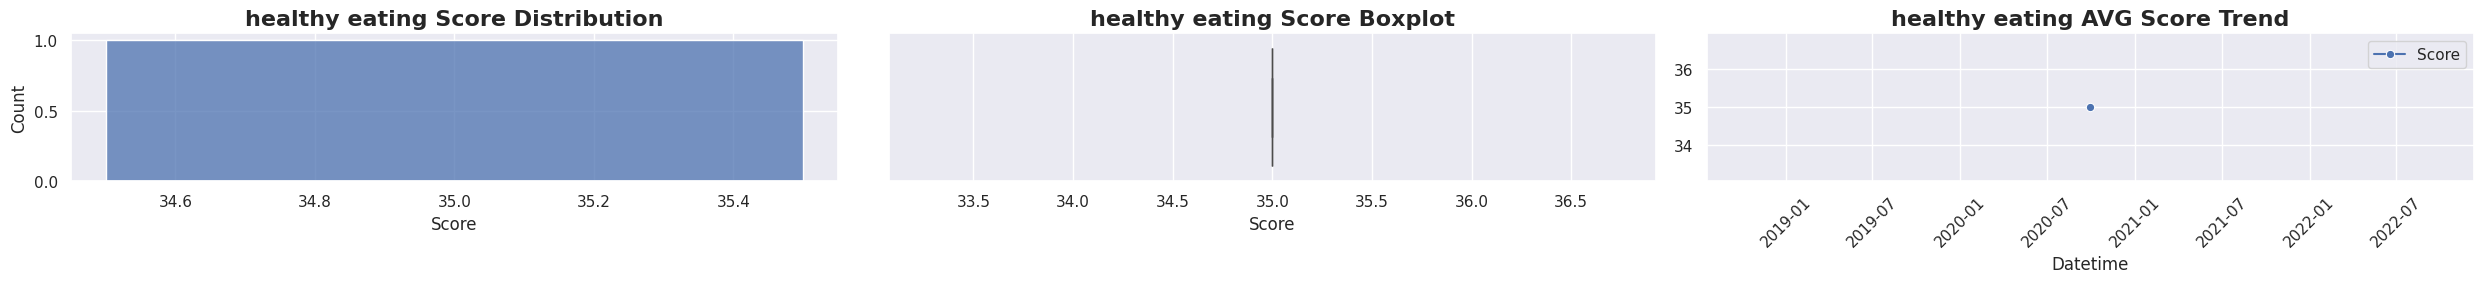

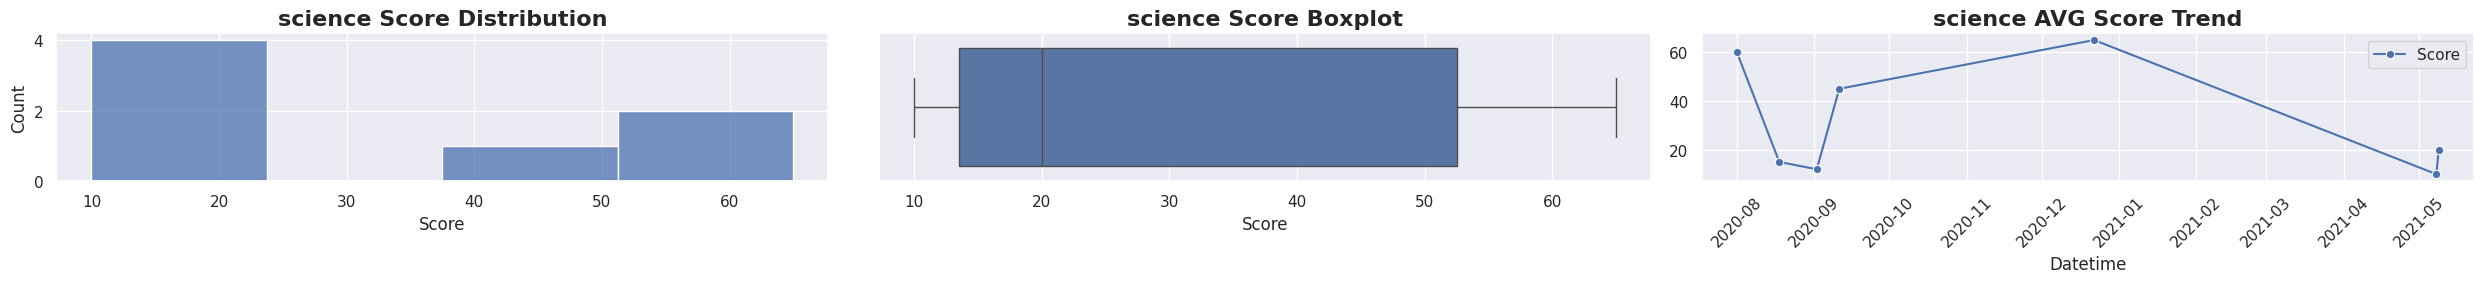

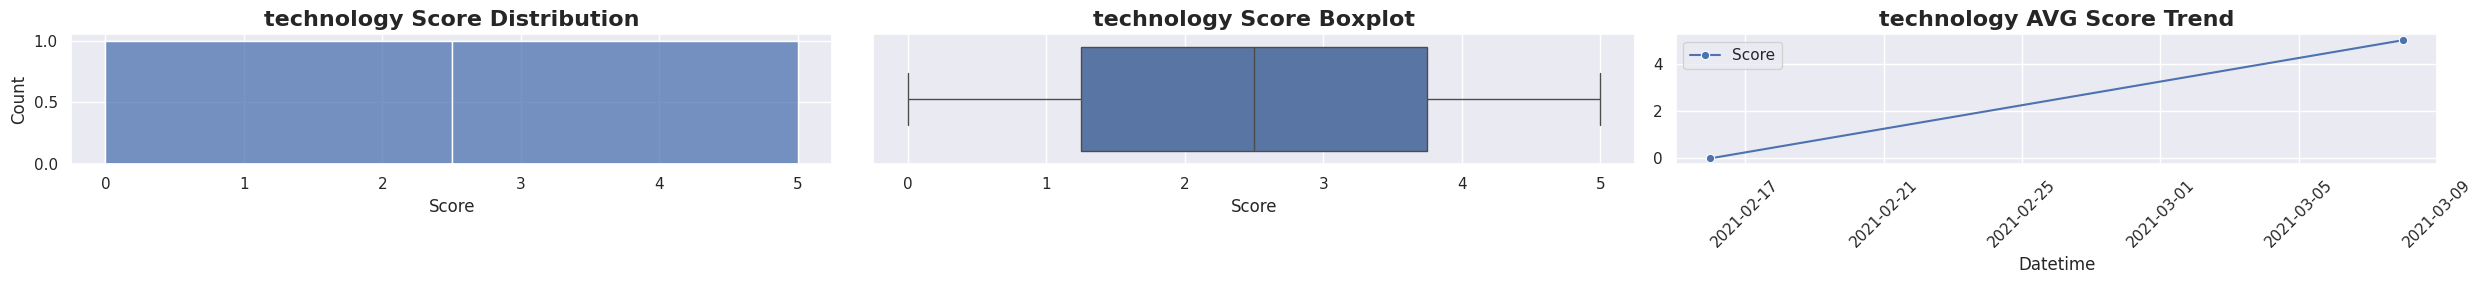

In [113]:
for cat in df['Category'].unique(): # loop in Category column
    plt.figure(figsize= (25, 3))

    plt.subplot(1, 3, 1) # create histplot
    sns.histplot(data= df[df['Category'] == cat],
                 x= 'Score',
                 bins= 'auto')
    plt.title(f'{cat} Score Distribution', fontdict= {'size': 16, 'weight': 'bold'})

    plt.subplot(1, 3, 2) # create boxplot
    sns.boxplot(data= df[df['Category'] == cat],
                x= 'Score')
    plt.title(f'{cat} Score Boxplot', fontdict= {'size': 16, 'weight': 'bold'})

    plt.tight_layout()
    plt.show()

In [ ]:
# Analyse Score with Category, content_type

print(df.groupby(['Category', 'content_type'], as_index= False).agg({'Score': 'sum', 'Content ID': 'count', 'User ID': 'count'}).sort_values(by= 'Score', ascending= False))

           Category content_type  Score  Content ID  User ID
13  public speaking        video    137           2        2
16          science        photo    122           3        3
23           travel        video    115           3        3
17           soccer          GIF    105           2        2
8         education        video     95           2        2
12  public speaking        audio     95           2        2
0           animals        audio     75           1        1
15          science        audio     75           2        2
6           culture        photo     70           1        1
3           cooking        audio     70           1        1
1           animals        photo     70           1        1
2           cooking          GIF     65           1        1
4           culture          GIF     65           1        1
7         education        photo     45           2        2
11   healthy eating          GIF     35           1        1
21           tennis     

# Time Series Analysis

In [33]:
# Analyse Score by Date

print(df.set_index('Datetime').resample('ME').agg({'Score': 'mean'}))

            Score
Datetime         
2020-07-31   37.5
2020-08-31   49.0
2020-09-30   45.4
2020-10-31   55.0
2020-11-30   25.0
2020-12-31   55.0
2021-01-31   30.0
2021-02-28   23.4
2021-03-31   25.0
2021-04-30   65.0
2021-05-31   37.5
2021-06-30   15.0


In [34]:
# The Date with highest Score

print(df.set_index('Datetime').resample('ME').agg({'Score': 'mean'}).idxmax(axis= 'index'))

Score   2021-04-30
dtype: datetime64[ns]


In [35]:
# The Date with lowest Score

print(df.set_index('Datetime').resample('ME').agg({'Score': 'mean'}).idxmin(axis= 'index'))

Score   2021-06-30
dtype: datetime64[ns]


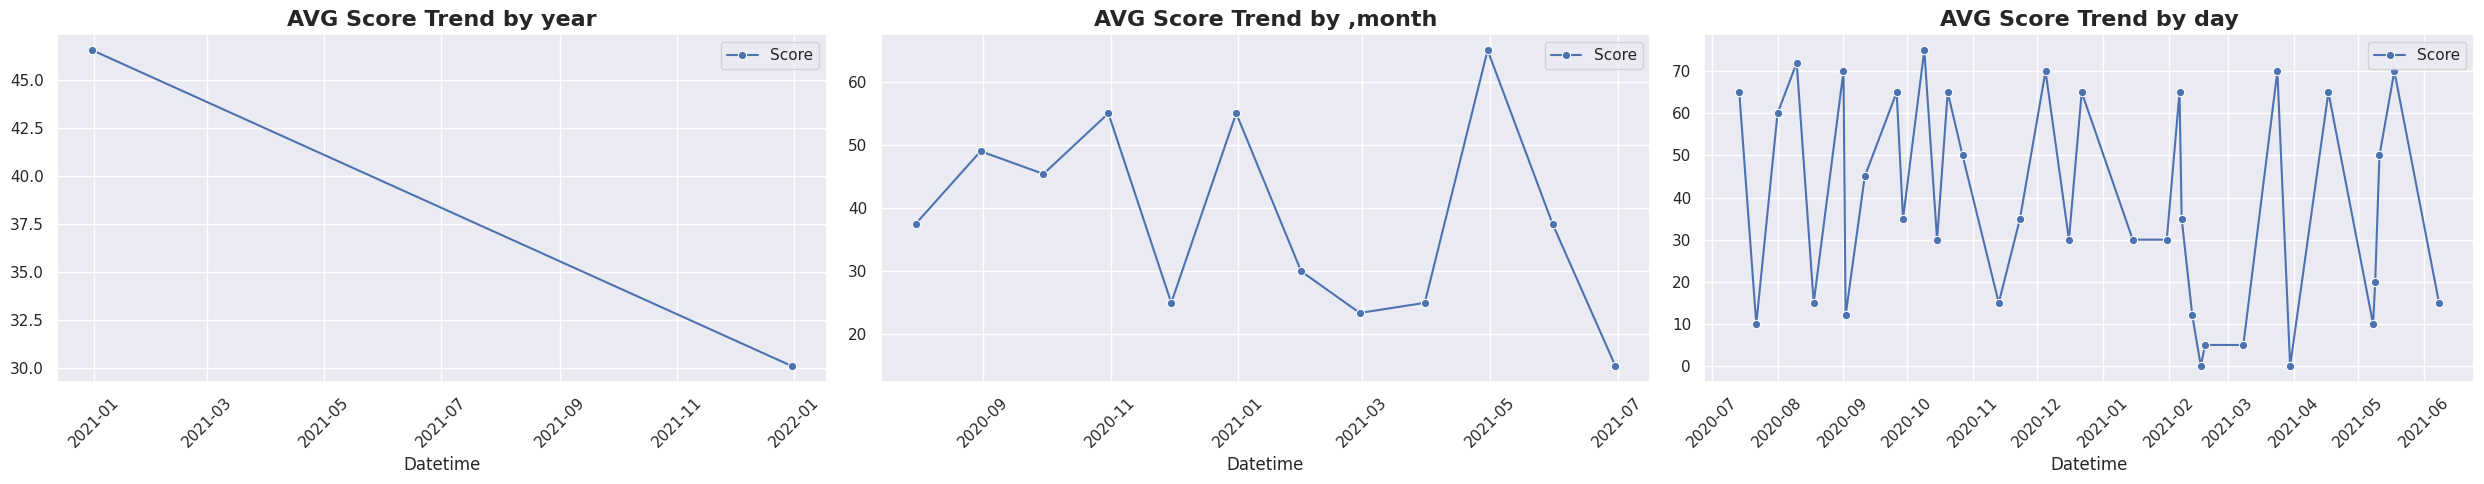

In [115]:
# Analyse Score by date

plt.figure(figsize= (25, 5))

plt.subplot(1, 3, 1)
sns.lineplot(data= df.set_index('Datetime').resample('YE').agg({'Score': 'mean'}),
             markers= 'o')
plt.xticks(rotation= 45)
plt.title('AVG Score Trend by year', fontdict= {'size': 16, 'weight': 'bold'})

plt.subplot(1, 3, 2)
sns.lineplot(data= df.set_index('Datetime').resample('ME').agg({'Score': 'mean'}),
             markers= 'o')
plt.xticks(rotation= 45)
plt.title('AVG Score Trend by ,month', fontdict= {'size': 16, 'weight': 'bold'})

plt.subplot(1, 3, 3)
sns.lineplot(data= df.set_index('Datetime').resample('D').agg({'Score': 'mean'}),
             markers= 'o')
plt.xticks(rotation= 45)
plt.title('AVG Score Trend by day', fontdict= {'size': 16, 'weight': 'bold'})

plt.tight_layout()
plt.show()

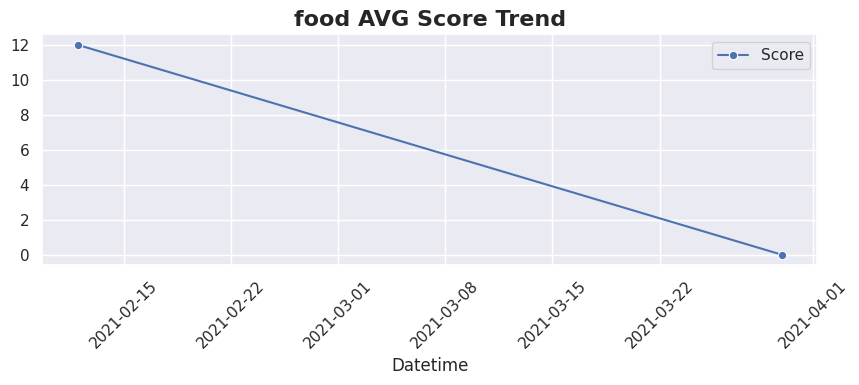

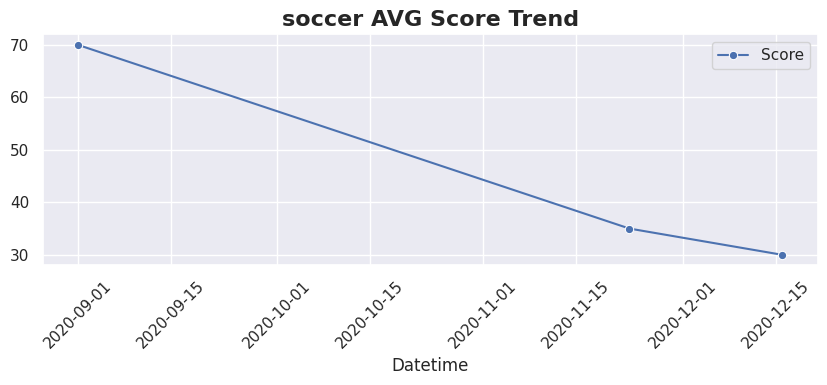

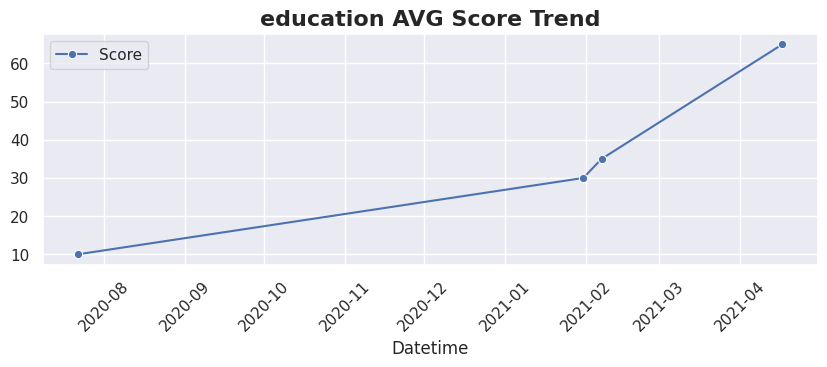

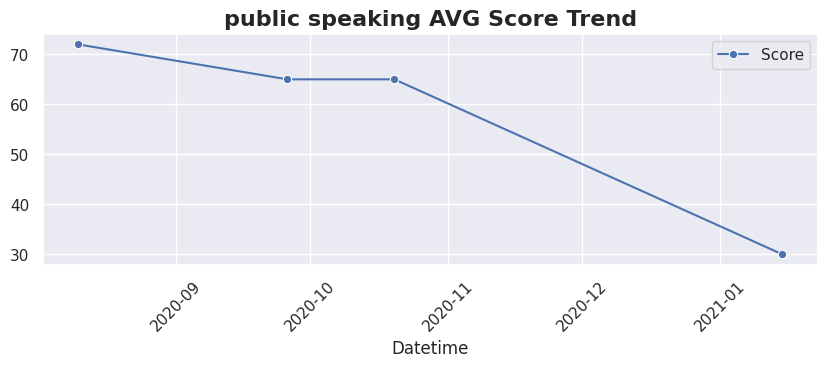

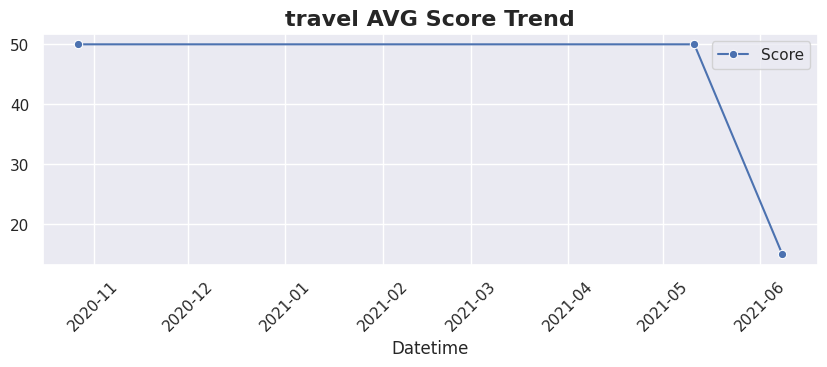

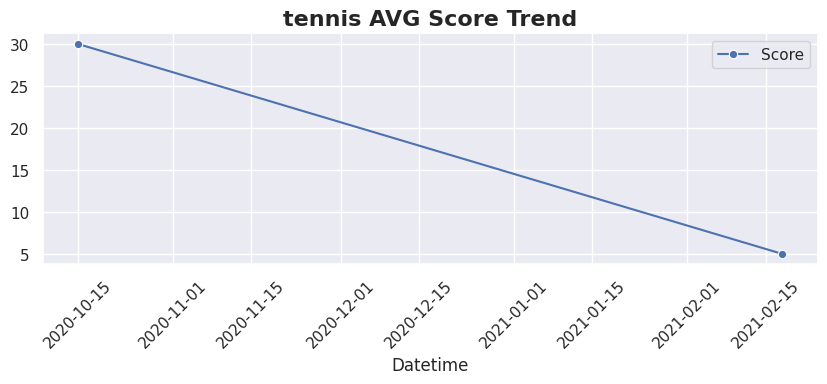

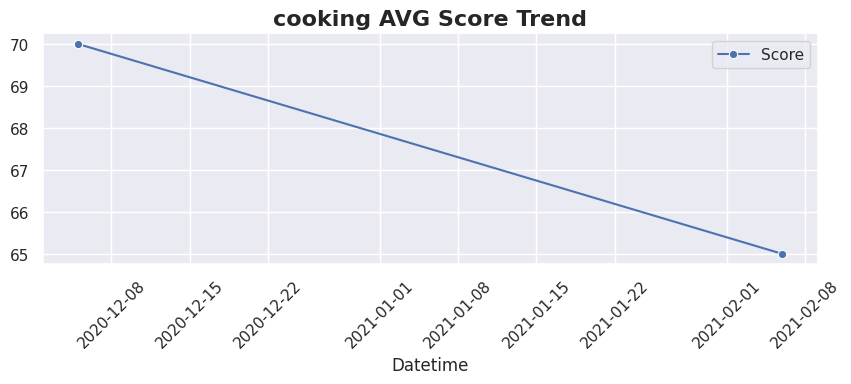

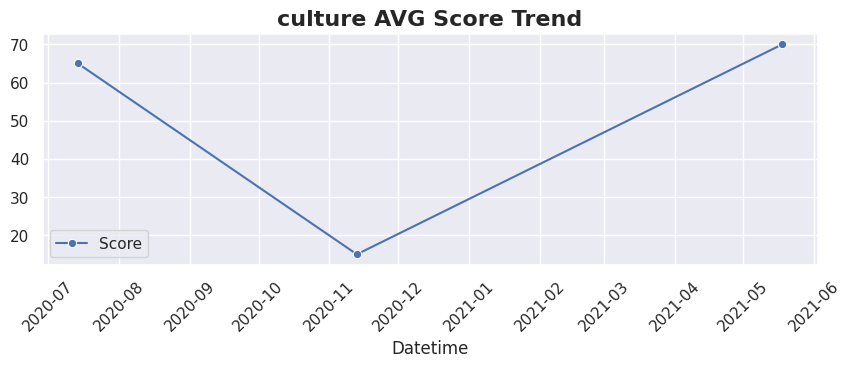

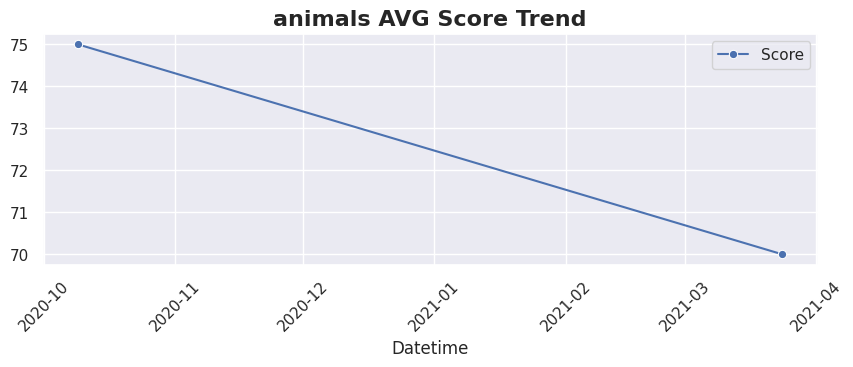

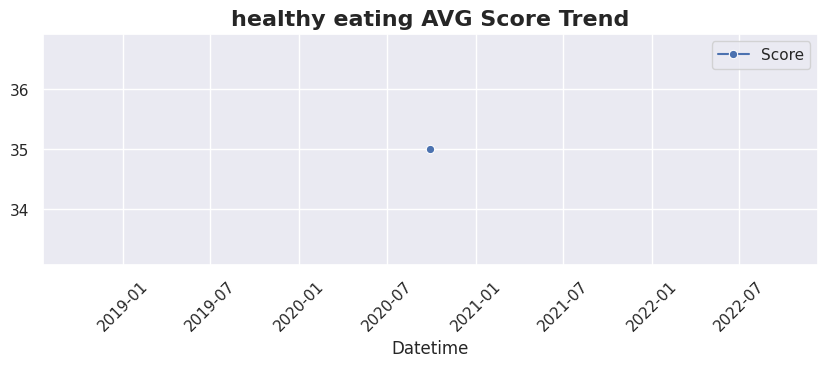

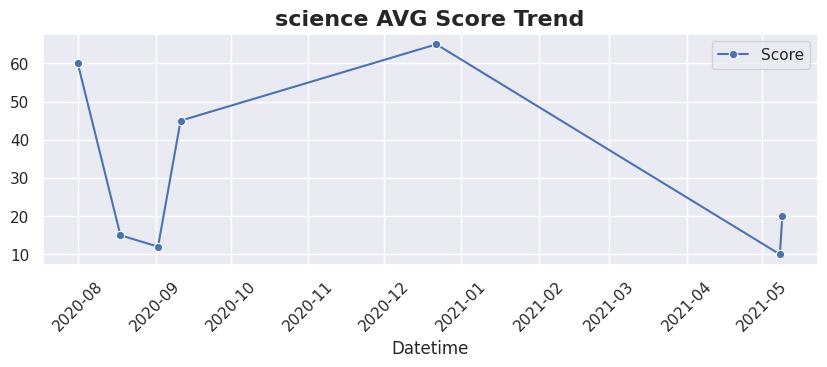

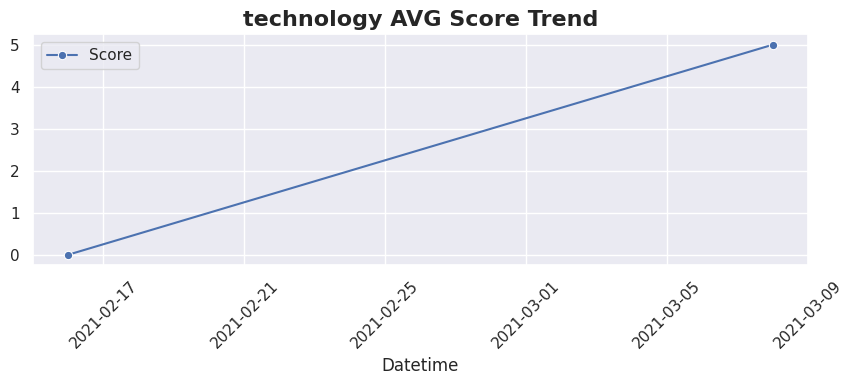

In [118]:
for cat in df['Category'].unique(): # loop in Category column
    plt.figure(figsize= (10, 3))
    sns.lineplot(data= df[df['Category'] == cat].set_index('Datetime').resample('D').agg({'Score': 'mean'}),
                 markers= 'o')
    plt.xticks(rotation= 45)
    plt.title(f'{cat} AVG Score Trend', fontdict= {'size': 16, 'weight': 'bold'})
    plt.show()